In [ ]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
# Reading csv file for enrolment
df = pd.read_csv("enrolment_data_final.csv")

# chechink the df
df.sample(15)

,School Number,Year,School Type,School Level,Grade 1 Enrolment,Grade 2 Enrolment,Grade 3 Enrolment,Grade 4 Enrolment,Grade 5 Enrolment,Grade 6 Enrolment,Grade 7 Enrolment,Grade 8 Enrolment,Grade 9 Enrolment,Grade 10 Enrolment,Grade 11 Enrolment,Grade 12 Enrolment,Total Enrolment
7418,789690,2020-2021,Catholic,Elementary,50,55,40,40,25,35,25,25,0,0,0,0,295
2331,308455,2019-2020,Public,Elementary,120,85,120,125,125,0,0,0,0,0,0,0,575
11,202614,2019-2020,Public,Elementary,55,50,55,55,55,50,55,45,0,0,0,0,420
3205,127680,2019-2020,Public,Elementary,100,105,75,85,0,0,0,0,0,0,0,0,365
936,835536,2019-2020,Catholic,Elementary,35,35,35,45,50,60,45,60,0,0,0,0,365
786,529648,2019-2020,Public,Elementary,40,35,35,30,40,30,35,25,0,0,0,0,270
11808,796611,2021-2022,Catholic,Elementary,30,30,30,35,20,40,35,40,0,0,0,0,260
2664,612405,2019-2020,Public,Elementary,55,45,55,55,65,55,70,60,0,0,0,0,460
7799,346659,2020-2021,Public,Elementary,15,10,20,15,10,10,0,0,0,0,0,0,80
9578,722790,2021-2022,Catholic,Secondary,0,0,0,0,0,0,0,0,150,140,140,200,630


In [ ]:
df_100048 = df[df["School Number"] == 100048]

In [ ]:
df_100048.head()

,School Number,Year,School Type,School Level,Grade 1 Enrolment,Grade 2 Enrolment,Grade 3 Enrolment,Grade 4 Enrolment,Grade 5 Enrolment,Grade 6 Enrolment,Grade 7 Enrolment,Grade 8 Enrolment,Grade 9 Enrolment,Grade 10 Enrolment,Grade 11 Enrolment,Grade 12 Enrolment,Total Enrolment
3176,100048,2019-2020,Public,Elementary,40,35,40,35,35,0,0,0,0,0,0,0,185
7539,100048,2020-2021,Public,Elementary,20,20,15,25,20,0,0,0,0,0,0,0,100
11916,100048,2021-2022,Public,Elementary,30,35,30,15,25,0,0,0,0,0,0,0,135


In [ ]:
# Extracting the first year for each row
df["Year"] = df["Year"].str.split("-").str[0]

In [ ]:
# Transform the Year column to float
df["Year"] = df["Year"].astype(int)

In [ ]:
#chack dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13088 entries, 0 to 13087
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   School Number       13088 non-null  int64 
 1   Year                13088 non-null  int64 
 2   School Type         13088 non-null  object
 3   School Level        13088 non-null  object
 4   Grade 1 Enrolment   13088 non-null  int64 
 5   Grade 2 Enrolment   13088 non-null  int64 
 6   Grade 3 Enrolment   13088 non-null  int64 
 7   Grade 4 Enrolment   13088 non-null  int64 
 8   Grade 5 Enrolment   13088 non-null  int64 
 9   Grade 6 Enrolment   13088 non-null  int64 
 10  Grade 7 Enrolment   13088 non-null  int64 
 11  Grade 8 Enrolment   13088 non-null  int64 
 12  Grade 9 Enrolment   13088 non-null  int64 
 13  Grade 10 Enrolment  13088 non-null  int64 
 14  Grade 11 Enrolment  13088 non-null  int64 
 15  Grade 12 Enrolment  13088 non-null  int64 
 16  Total Enrolment     13

In [ ]:
df.sample(15)

,School Number,Year,School Type,School Level,Grade 1 Enrolment,Grade 2 Enrolment,Grade 3 Enrolment,Grade 4 Enrolment,Grade 5 Enrolment,Grade 6 Enrolment,Grade 7 Enrolment,Grade 8 Enrolment,Grade 9 Enrolment,Grade 10 Enrolment,Grade 11 Enrolment,Grade 12 Enrolment,Total Enrolment
12157,312339,2021,Public,Elementary,30,30,40,35,35,0,0,0,0,0,0,0,170
4929,688762,2020,Catholic,Elementary,50,50,55,40,50,50,0,0,0,0,0,0,295
7610,158020,2020,Public,Elementary,75,60,70,45,50,30,30,40,0,0,0,0,400
635,710903,2019,Catholic,Secondary,0,0,0,0,0,0,0,0,175,180,180,190,725
2833,438062,2019,Public,Elementary,45,50,55,70,70,65,85,60,0,0,0,0,500
5393,619779,2020,Public,Elementary,55,70,80,85,75,95,85,75,0,0,0,0,620
796,598984,2019,Public,Elementary,25,35,20,30,35,25,25,35,0,0,0,0,230
11404,585599,2021,Public,Elementary,80,95,100,75,85,75,80,85,0,0,0,0,675
8860,951692,2021,Public,Secondary,0,0,0,0,0,0,0,0,295,255,295,395,1240
8419,819492,2020,Catholic,Elementary,45,35,30,45,50,45,0,0,0,0,0,0,250


In [ ]:
# Assigning features and target to variables
X = df[[col for col in df.columns if col != "Total Enrolment" and col != "School Type" and col != "School Level"]]
y = df["Total Enrolment"]

In [ ]:
X.sample(20)

,School Number,Year,Grade 1 Enrolment,Grade 2 Enrolment,Grade 3 Enrolment,Grade 4 Enrolment,Grade 5 Enrolment,Grade 6 Enrolment,Grade 7 Enrolment,Grade 8 Enrolment,Grade 9 Enrolment,Grade 10 Enrolment,Grade 11 Enrolment,Grade 12 Enrolment
1318,411795,2019,45,40,45,45,55,40,65,45,0,0,0,0
8063,896578,2020,0,0,0,0,0,0,0,0,120,100,135,130
10469,604992,2021,15,10,20,10,15,15,10,15,0,0,0,0
4038,737984,2019,40,40,40,40,55,50,60,55,0,0,0,0
4254,326712,2019,0,105,100,100,100,70,90,85,0,0,0,0
384,802662,2019,15,25,35,20,30,25,0,0,0,0,0,0
8041,307947,2020,35,35,45,45,50,50,35,50,0,0,0,0
8071,902810,2020,0,0,0,0,0,0,0,0,135,120,125,140
189,853038,2019,15,20,15,25,15,15,15,15,0,0,0,0
8491,793809,2020,45,30,45,40,50,50,60,50,0,0,0,0


In [ ]:
# Deviding our features and target in training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defining and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predictions
predictions = model.predict(X_test)

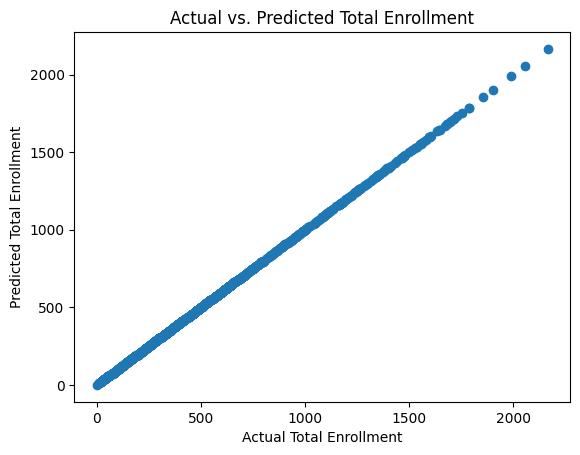

In [ ]:
# Visualizing the predictions results
plt.scatter(y_test, predictions)
plt.xlabel("Actual Total Enrollment")
plt.ylabel("Predicted Total Enrollment")
plt.title("Actual vs. Predicted Total Enrollment")
plt.show()

In [ ]:
# Saving the model for later use in the app
with open("enrollment_prediction_model", "wb") as file:
  pickle.dump(model, file)